In [1]:
import modal
from modal_colabfold import generate_a3m_files
import pandas as pd
from binder_design import EGFS, FOLD_RESULTS_DIR, PEPMLM_RESULTS_DIR, DATA_DIR, EVO_PROT_GRAD_RESULTS_DIR
from binder_design.utils import get_mutation_diff, hash_seq
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re
%load_ext autoreload
%autoreload 2

In [2]:
csvs = list(EVO_PROT_GRAD_RESULTS_DIR.glob('*.csv'))
dfs = [pd.read_csv(csv) for csv in csvs]
evo_prot_grad_df = pd.concat(dfs).reset_index(drop=True)
# evo_prot_grad_df.iloc[0]['binder_sequence']

In [3]:
evo_prot_grad_df['seq_id'] = evo_prot_grad_df['binder_sequence'].apply(hash_seq)

In [4]:


csvs = list(PEPMLM_RESULTS_DIR.glob('*.csv'))
dfs = []
for csv in csvs:
    _df = pd.read_csv(csv)
    match = re.search(r'gen(\d+)', str(csv))
    if match:
        gen_num = int(match.group(1))
    else:
        gen_num = None
    _df['generation'] = gen_num
    dfs.append(_df)
pepmlm_df = pd.concat(dfs).sort_values('unmasked_ppl').reset_index(drop=True)

In [5]:
fold_csvs = list(FOLD_RESULTS_DIR.glob('*.csv'))
dfs = []
for csv in fold_csvs:
    _df = pd.read_csv(csv)
    _df['filename'] = csv.name
    dfs.append(_df)
fold_df = pd.concat(dfs)
fold_df = fold_df.query('binder_length == 50').drop_duplicates(subset=['seq_id']).sort_values('pae_interaction').reset_index(drop=True)

In [6]:
fold_df['mut_str'] = fold_df['binder_sequence'].apply(get_mutation_diff, seq2=EGFS)

In [7]:
fold_df['n_mutations'] = fold_df['mut_str'].apply(lambda x: len(x.split(',')))

In [8]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))


In [9]:

# Get the list of sequences
sequences = fold_df['binder_sequence'].tolist()

# Compute pairwise distances
n = len(sequences)
hamming_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        dist = hamming_distance(sequences[i], sequences[j])
        hamming_matrix[i, j] = dist
        hamming_matrix[j, i] = dist

# Convert to DataFrame for better visualization
hamming_df = pd.DataFrame(hamming_matrix, index=fold_df['seq_name'], columns=fold_df['seq_name'])


In [212]:

hamming_df.iloc[:40, :40]

seq_name,dda1c8,158511,06b390,aa2c76,e50198,5c4c20,23b084,7e21e5,8583bd,eb8567,...,777825,0a0ce4,47bfb7,b893ce,d4e93b,9c0fa8,8a700d,5b5145,e1ae22,aaacfa
seq_name,,,,,,,,,,,,,,,,,,,,,
dda1c8,0.0,2.0,2.0,12.0,3.0,12.0,11.0,12.0,10.0,12.0,...,13.0,10.0,10.0,10.0,11.0,11.0,22.0,12.0,11.0,13.0
158511,2.0,0.0,4.0,14.0,5.0,13.0,13.0,14.0,12.0,14.0,...,15.0,12.0,12.0,12.0,13.0,13.0,24.0,14.0,13.0,14.0
06b390,2.0,4.0,0.0,10.0,5.0,10.0,9.0,10.0,8.0,10.0,...,11.0,8.0,8.0,9.0,9.0,9.0,21.0,10.0,9.0,11.0
aa2c76,12.0,14.0,10.0,0.0,15.0,9.0,8.0,6.0,7.0,6.0,...,7.0,8.0,7.0,8.0,5.0,9.0,16.0,8.0,9.0,10.0
e50198,3.0,5.0,5.0,15.0,0.0,15.0,14.0,15.0,13.0,15.0,...,15.0,12.0,13.0,13.0,14.0,13.0,23.0,14.0,13.0,16.0
5c4c20,12.0,13.0,10.0,9.0,15.0,0.0,6.0,9.0,5.0,8.0,...,9.0,7.0,6.0,6.0,8.0,8.0,19.0,8.0,7.0,1.0
23b084,11.0,13.0,9.0,8.0,14.0,6.0,0.0,8.0,4.0,6.0,...,7.0,4.0,3.0,4.0,7.0,5.0,18.0,7.0,5.0,6.0
7e21e5,12.0,14.0,10.0,6.0,15.0,9.0,8.0,0.0,7.0,2.0,...,3.0,8.0,7.0,8.0,1.0,9.0,16.0,8.0,9.0,10.0
8583bd,10.0,12.0,8.0,7.0,13.0,5.0,4.0,7.0,0.0,7.0,...,8.0,4.0,3.0,2.0,6.0,5.0,19.0,4.0,4.0,6.0


In [47]:
merged = fold_df.merge(pepmlm_df.drop_duplicates(subset=['seq_id']), on='seq_id', how='left')

In [10]:
epg_merged = fold_df.merge(evo_prot_grad_df, on='seq_id', how='left')

In [49]:
double_merged = merged.merge(epg_merged, on='seq_id')

In [11]:
epg_merged

,seq_name,binder_sequence_x,target_sequence,binder_length,target_length,model_number,binder_plddt,binder_pae,pae_interaction,ptm,seq_id,pdb_content,generation,filename,mut_str,n_mutations,binder_sequence_y,pred_pae_interaction,parent_sequence,chain
0,dda1c8,PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCIIGYSGDRVQTFD...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,92.1362,3.101180,7.646816,0.87,dda1c8,MODEL 1 ...,2.0,fold_results_20240818_213503.csv,"N1P,Y3F,P4S,G5A,S9N,Y13V,L15C,M21H,H22L,I23A,D...",17,PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCIIGYSGDRVQTFD...,7.845734,PSFSACPSNYDGVCGNGGVCHLAESLTSYTCQCVIGYSGDRVQTFD...,0.0
1,158511,PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCILGYSGHRVQTFD...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,91.9338,3.139984,7.720009,0.87,158511,MODEL 1 ...,4.0,fold_results_20240818_215834.csv,"N1P,Y3F,P4S,G5A,S9N,Y13V,L15C,M21H,H22L,I23A,D...",19,PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCILGYSGHRVQTFD...,7.646816,PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCIIGYSGDRVQTFD...,0.0
2,06b390,PSFSACPSNYDGVCGNGGVCHLAESLTSYTCQCVIGYSGDRVQTFD...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,91.5556,3.169004,7.845734,0.86,06b390,MODEL 1 ...,1.0,fold_results_20240818_205746.csv,"N1P,Y3F,P4S,G5A,S9N,Y13V,L15G,M21H,H22L,I23A,D...",16,PSFSACPSNYDGVCGNGGVCHLAESLTSYTCQCVIGYSGDRVQTFD...,10.264578,PSYSACPSNYDGVCGNGGVCHLAESLTSYTCQCVIGYSGDRVQTHD...,0.0
3,aa2c76,PSYSACPSSYDGYCGNGGVCKHIESLDSYTCQCVIGCSGDRDQTAD...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,90.1208,3.486336,8.000464,0.86,aa2c76,MODEL 1 ...,2.0,fold_results_20240818_213503.csv,"N1P,P4S,G5A,L15G,M21K,N32Q,Y37C,C42D,R45A,W49Y...",11,PSYSACPSSYDGYCGNGGVCKHIESLDSYTCQCVIGCSGDRDQTAD...,8.377456,PSYSACPSSYDGYCGNGGVCKHIESLDSYTCQCVIGYSGDRTQTAD...,0.0
4,e50198,PKFSACCSNYDGVCCNGGVCHLAEELTSYTCQCIIGYSGDRVQTFD...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,90.3734,3.460784,8.050868,0.86,e50198,MODEL 1 ...,1.0,fold_results_20240818_222415.csv,"N1P,S2K,Y3F,P4S,G5A,P7C,S9N,Y13V,L15C,M21H,H22...",20,PKFSACCSNYDGVCCNGGVCHLAEELTSYTCQCIIGYSGDRVQTFD...,7.646816,PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCIIGYSGDRVQTFD...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,ecd097,NAYPGCPGSFDGYCPNGGVCTHIESTDCFTKECLPGYSGDTVHTRA...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,34.1310,12.777812,22.096905,0.63,ecd097,MODEL 1 ...,1.0,fold_results_20240818_133906.csv,"S2A,S8G,Y10F,L15P,M21T,L26T,S28C,Y29F,C31K,N32...",18,NaN,NaN,NaN,NaN
864,69f1f5,ISYSACPLSYDGVEGNGGVCKHALSLDSDICQCVWGYSPDRVQTRD...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,29.2990,14.324032,22.124084,0.64,69f1f5,MODEL 1 ...,3.0,fold_results_20240818_225601.csv,"N1I,P4S,G5A,S8L,Y13V,C14E,L15G,M21K,I23A,E24L,...",18,ISYSACPLSYDGVEGNGGVCKHALSLDSDICQCVWGYSPDRVQTRD...,8.281485,ISYSACPLSYDGVCGNGGVCKHALSLDSDTCQCVWGYSGDRVQTRD...,0.0
865,543d87,NAYPGQPHSFDGYCPNGGVCTHIESTDCFTCECLPGYSGDTVHTRA...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,31.0638,14.199040,22.160599,0.64,543d87,MODEL 1 ...,1.0,fold_results_20240818_133906.csv,"S2A,C6Q,S8H,Y10F,L15P,M21T,L26T,S28C,Y29F,N32E...",18,NaN,NaN,NaN,NaN
866,ebeda1,NAYPGCPGSFDGPCPNGGVCTHIESTDCFTCECLPGYSGDTVHTHA...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,30.4590,13.669512,22.564507,0.64,ebeda1,MODEL 1 ...,1.0,fold_results_20240818_133906.csv,"S2A,S8G,Y10F,Y13P,L15P,M21T,L26T,S28C,Y29F,N32...",19,NaN,NaN,NaN,NaN


In [12]:
fold_df.drop(columns=['pdb_content']).to_csv('fdf.csv')

<Axes: xlabel='pred_pae_interaction', ylabel='pae_interaction'>

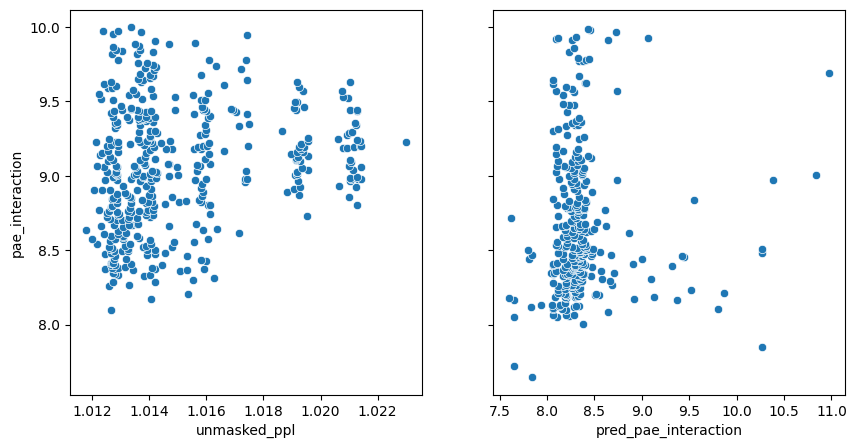

In [11]:
f,axs = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.scatterplot(y='pae_interaction', x='unmasked_ppl', data=merged.query('pae_interaction < 10'), ax=axs[0])
sns.scatterplot(y='pae_interaction', x='pred_pae_interaction', data=epg_merged.query('pae_interaction < 10'), ax=axs[1])

In [28]:
fdf['mut_str'] = fdf['binder_sequence'].apply(get_mutation_diff, seq2=EGFS)

In [86]:
pd.read_csv('/Users/alex/code/binder_design/data/fold_results/fold_results_20240818_153202.csv')

,seq_name,binder_sequence,target_sequence,binder_length,target_length,model_number,binder_plddt,binder_pae,pae_interaction,ptm,seq_id,pdb_content,mut_str
0,33992b,PSYSGCPSSADGYCGNGGVCMHIESLDSYTCQCVIGYSGDRVQTRD...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,87.1346,4.14698,8.801770,0.85,33992b,MODEL 1 ...,"P1N,S4P,A10Y,G15L,Q32N,V42C,T50W"
1,6497c2,PAYSGCPSSYDGYCGNGGVCMHIESLDSYTCQCVIGYSGDRVQTRD...,LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYV...,50,622,1,89.2258,3.74650,8.375646,0.85,6497c2,MODEL 1 ...,"P1N,A2S,S4P,G15L,Q32N,V42C,T50W"


In [28]:
to_submit = fold_df.head(3).set_index('seq_id')['binder_sequence'].to_dict()

In [23]:
import numpy as np
# Sort the dataframe by pae_interaction (assuming lower is better) and select top 100
top_50 = fold_df.sort_values('pae_interaction').iloc[3:53]

# Compute Hamming distances for the top 100
sequences = top_50['binder_sequence'].tolist()
n = len(sequences)
hamming_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        dist = hamming_distance(sequences[i], sequences[j])
        hamming_matrix[i, j] = dist
        hamming_matrix[j, i] = dist

# Greedy diversity selection
def select_diverse(distances, k):
    selected = [0]  # Start with the first sequence
    while len(selected) < k:
        distances_to_selected = distances[selected, :].min(axis=0)
        next_diverse = np.argmax(distances_to_selected)
        if next_diverse in selected:
            break  # No more diverse sequences to add
        selected.append(next_diverse)
    return selected

# Select 10 diverse sequences from the top 100
diverse_indices = select_diverse(hamming_matrix, 7)

# Get the diverse sequences
diverse_sequences = top_50.iloc[diverse_indices]

print("Selected diverse sequences:")
print(diverse_sequences[['seq_name', 'binder_sequence', 'pae_interaction', 'mut_str']])

# Visualize the Hamming distances between the selected sequences
diverse_hamming = hamming_matrix[np.ix_(diverse_indices, diverse_indices)]
diverse_hamming_df = pd.DataFrame(diverse_hamming, 
                                  index=diverse_sequences['seq_name'], 
                                  columns=diverse_sequences['seq_name'])



Selected diverse sequences:
   seq_name                                    binder_sequence  \
3    aa2c76  PSYSACPSSYDGYCGNGGVCKHIESLDSYTCQCVIGCSGDRDQTAD...   
38   8a700d  NCYSACNSSYAGYCLESGVCQHICSMDSYTCHCVIGYSGDRTQTHD...   
4    e50198  PKFSACCSNYDGVCCNGGVCHLAEELTSYTCQCIIGYSGDRVQTFD...   
25   65bf78  ISYSACPLSYDGVCGNGGVCKHALSLDSDTCQCVWDYMGDRVQTED...   
21   233236  PSYSACPSCYDGVCGNGGVCKHAQSLDSYTCKCYIGYIGDRVQTRD...   
42   36550b  PFYSACPSSYDGYCGNGGVCMHIQSLDSYTCQCYIGYSGPRVQTRD...   
19   af805e  PSYSACPVRYDGFCGNGGVCKHIESLDSYTCQCVIGYSGHREQTYD...   

    pae_interaction                                            mut_str  
3          8.000464  N1P,P4S,G5A,L15G,M21K,N32Q,Y37C,C42D,R45A,W49Y...  
38         8.207150  S2C,P4S,G5A,P7N,D11A,N16E,G17S,M21Q,E24C,L26M,...  
4          8.050868  N1P,S2K,Y3F,P4S,G5A,P7C,S9N,Y13V,L15C,M21H,H22...  
25         8.172739  N1I,P4S,G5A,S8L,Y13V,L15G,M21K,I23A,E24L,Y29D,...  
21         8.133631  N1P,P4S,G5A,S9C,Y13V,L15G,M21K,I23A,E24Q,N32K,...  
42   

In [35]:
to_submit.update(diverse_sequences.set_index('seq_name')['binder_sequence'].to_dict())

In [37]:
with open('submission.fasta', 'w') as f:
    for seq_name, sequence in to_submit.items():
        f.write(f'>{seq_name}\n{sequence}\n')

# Display the contents of the FASTA file
with open('submission.fasta', 'r') as f:
    print(f.read())

>dda1c8
PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCIIGYSGDRVQTFDLRYT
>158511
PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCILGYSGHRVQTFDLRYT
>06b390
PSFSACPSNYDGVCGNGGVCHLAESLTSYTCQCVIGYSGDRVQTFDLRYT
>aa2c76
PSYSACPSSYDGYCGNGGVCKHIESLDSYTCQCVIGCSGDRDQTADLRYT
>8a700d
NCYSACNSSYAGYCLESGVCQHICSMDSYTCHCVIGYSGDRTQTHDLRHS
>e50198
PKFSACCSNYDGVCCNGGVCHLAEELTSYTCQCIIGYSGDRVQTFDLRYT
>65bf78
ISYSACPLSYDGVCGNGGVCKHALSLDSDTCQCVWDYMGDRVQTEDLRYT
>233236
PSYSACPSCYDGVCGNGGVCKHAQSLDSYTCKCYIGYIGDRVQTRDLRYY
>36550b
PFYSACPSSYDGYCGNGGVCMHIQSLDSYTCQCYIGYSGPRVQTRDLRTT
>af805e
PSYSACPVRYDGFCGNGGVCKHIESLDSYTCQCVIGYSGHREQTYDLRST

